# `bw_temporalis` unusual temporal distributions

Sometimes we want to have more control on *when* things are occurring. Current `bw_temporalis` allows for the following:

* `FixedTimeOfYearTD`
* `FixedTD`

## `FixedTimeOfYearTD`

This allows you to say when in the year it happens, but not the year specifically. To use this you need to give a positive relative temporal distribution less than one year, e.g. month 3 day 1 to month 6 day 1. Then, when the graph traversal hits this node, it will figure out the correct year, and make sure that the complete period you have specified takes place *before* the dates in the incoming temporal distribution; otherwise, the year gets shifted backwards.

In [2]:
from bw_temporalis import (
    easy_timedelta_distribution, 
    easy_datetime_distribution, 
    FixedTD, 
    FixedTimeOfYearTD,
)

<Axes: xlabel='Date', ylabel='Amount'>

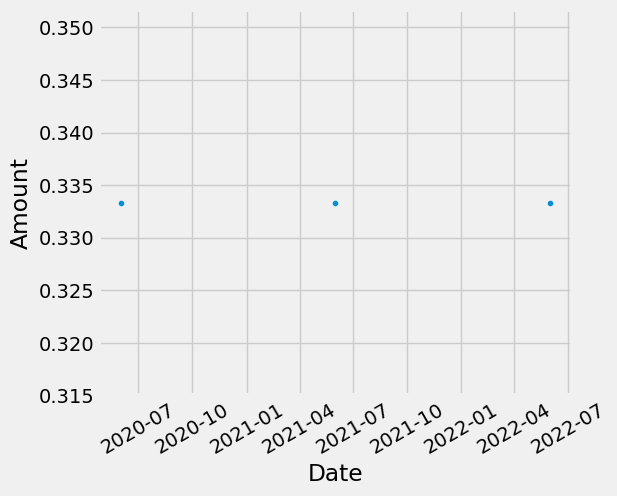

In [9]:
starting_td = easy_datetime_distribution(start="2020-06-01", end="2022-06-01", steps=3)
starting_td.graph()

In [6]:
input_td = easy_timedelta_distribution(start=2, end=8, resolution="M", steps=4)

<Axes: xlabel='Time (Months)', ylabel='Amount'>

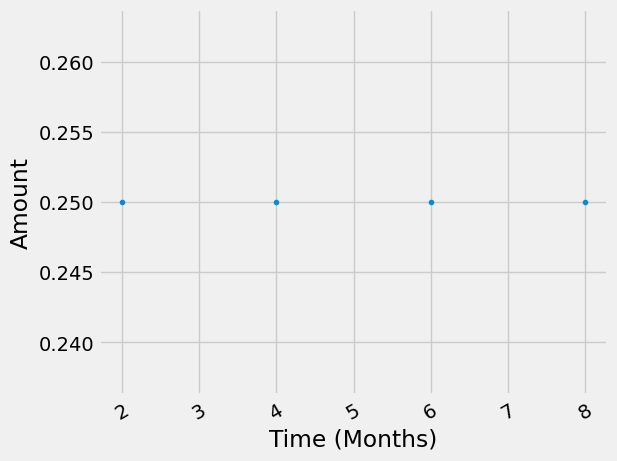

In [7]:
ftoy = FixedTimeOfYearTD(date=input_td.date, amount=input_td.amount)
ftoy.graph(resolution="M")

<Axes: xlabel='Date', ylabel='Amount'>

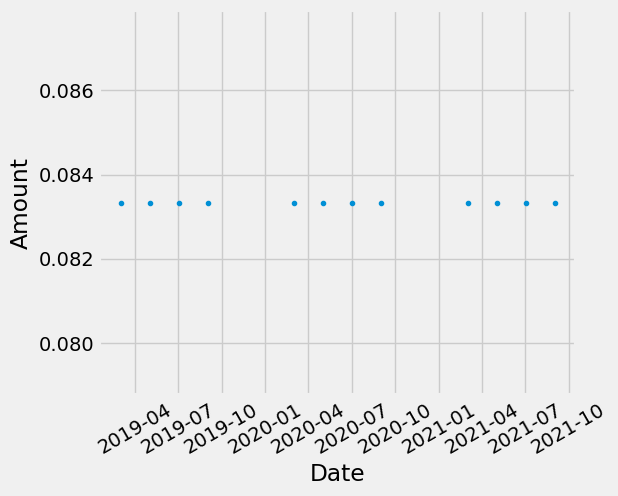

In [8]:
(starting_td * ftoy).graph()

The point here is that we don't *add* the ftoy time deltas, but use them replace the days and months in the input temporal distribution.

The use case which drove the development of this class was agriculture, which has to occur at certain months of the year.

## `FixedTD`

This is an absolute distribution which always takes place at the same time.

In [13]:
absolute_td = easy_datetime_distribution(start="1969-07-16", end="1969-07-24", steps=3)
fixed = FixedTD(date=absolute_td.date, amount=absolute_td.amount)

<Axes: xlabel='Date', ylabel='Amount'>

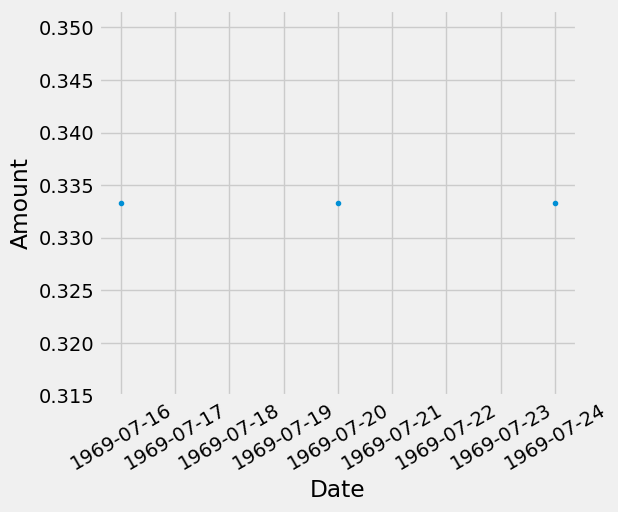

In [14]:
(fixed * easy_datetime_distribution(start="2020-06-01", end="2022-06-01", steps=3)).graph()

<Axes: xlabel='Date', ylabel='Amount'>

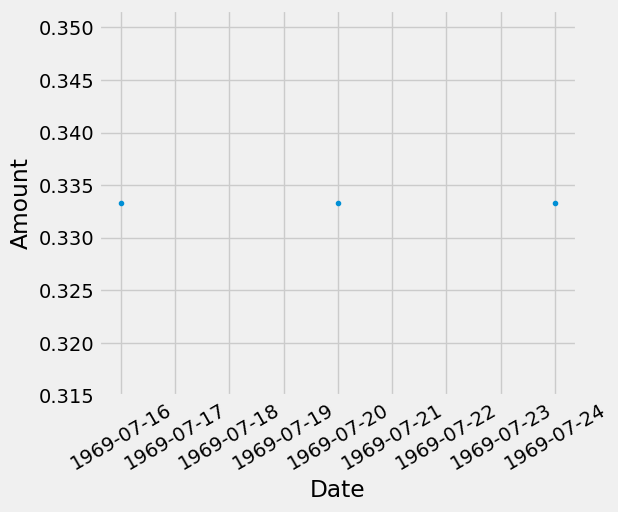

In [15]:
(fixed * easy_datetime_distribution(start="2120-06-01", end="2122-06-01", steps=3)).graph()